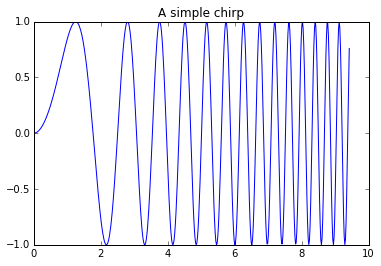

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');


In [3]:
# not necessary if running python setup.py install
#import sys,os.path
#sys.path.append(os.path.expanduser('~/wndchrm/wnd-charm-master/build/lib.macosx-10.10-x86_64-2.7/wndcharm'))
from wndcharm import *

In [4]:
import os

from wndcharm.FeatureSpace import FeatureSpace
f=FeatureSpace.NewFromFileOfFiles( os.path.expanduser('~/NIH_data/ipythOAI/master_fof.fof'), long=True )
f.ToFitFile()

LOADED  <FeatureVector "T2_map_Resliced_Slice7-l.sig" label="0" n_features=2919 grp=0 seq=0 fs_col=0>
LOADED  <FeatureVector "T2_map_Resliced_Slice5-l.sig" label="0" n_features=2919 grp=0 seq=0 fs_col=1>
LOADED  <FeatureVector "T2_map_Resliced_Slice7-l.sig" label="0" n_features=2919 grp=1 seq=0 fs_col=0>
LOADED  <FeatureVector "T2_map_Resliced_Slice5-l.sig" label="0" n_features=2919 grp=1 seq=0 fs_col=1>
LOADED  <FeatureVector "T2_map_Resliced_Slice7-l.sig" label="0" n_features=2919 grp=2 seq=0 fs_col=0>
LOADED  <FeatureVector "T2_map_Resliced_Slice5-l.sig" label="0" n_features=2919 grp=2 seq=0 fs_col=1>
LOADED  <FeatureVector "T2_map_Resliced_Slice7-l.sig" label="0" n_features=2919 grp=3 seq=0 fs_col=0>
LOADED  <FeatureVector "T2_map_Resliced_Slice5-l.sig" label="0" n_features=2919 grp=3 seq=0 fs_col=1>
LOADED  <FeatureVector "T2_map_Resliced_Slice7-l.sig" label="0" n_features=2919 grp=4 seq=0 fs_col=0>
LOADED  <FeatureVector "T2_map_Resliced_Slice5-l.sig" label="0" n_features=2919 gr

In [10]:
dmat = f.ContiguousDataMatrix()
print (dmat)
print (f.data_list)
print (f._contiguous_ground_truth_labels)
print (f._contiguous_ground_truth_values)

[[  2.46300000e+03   5.44220000e-02   2.34303000e-01 ...,  -4.82183000e+04
    1.35320000e+05   7.17610000e-01]
 [  2.46100000e+03   3.82510000e-02   4.73540000e-02 ...,  -5.96987000e+04
    1.22602000e+05   7.17989000e-01]
 [  2.46300000e+03   2.86680000e-02   2.27273000e-01 ...,  -5.46901000e+04
    1.32969000e+05   7.21117000e-01]
 ..., 
 [  2.47100000e+03   9.96700000e-03   9.09090000e-02 ...,  -6.31722000e+04
    1.30878000e+05   7.12536000e-01]
 [  2.46700000e+03   4.28820000e-02   2.16495000e-01 ...,  -6.16860000e+04
    1.32515000e+05   7.14215000e-01]
 [  2.45000000e+03   1.28302000e-01   7.62710000e-02 ...,  -6.06450000e+04
    1.25392000e+05   7.20067000e-01]]
[array([[  2.46300000e+03,   5.44220000e-02,   2.34303000e-01, ...,
         -4.82183000e+04,   1.35320000e+05,   7.17610000e-01],
       [  2.46100000e+03,   3.82510000e-02,   4.73540000e-02, ...,
         -5.96987000e+04,   1.22602000e+05,   7.17989000e-01],
       [  2.46300000e+03,   2.86680000e-02,   2.27273000e-0

In [16]:
print (f.class_names)


['0', '1']


In [1]:
import numpy as np
import scipy as sp
from scipy.stats import pearsonr
from sklearn.lda import LDA

In [ ]:
def normalize (self, train, test):
    self.train_set = train.copy() 
    mins, maxs = normalize_by_columns (self.train_set)
    self.test_set = test.copy() 
    normalize_by_columns (self.test_set, mins, maxs)
    return (self)

def normalize_by_columns ( full_stack, mins = None, maxs = None ):
    """This is a global function to normalize a matrix by columns.
    If numpy 1D arrays of mins and maxs are provided, the matrix will be normalized against these ranges
    Otherwise, the mins and maxs will be determined from the matrix, and the matrix will be normalized
    against itself. The mins and maxs will be returned as a tuple.
    Out of range matrix values will be clipped to min and max (including +/- INF)
    zero-range columns will be set to 0.
    NANs in the columns will be set to 0.
    The normalized output range is hard-coded to 0-100
    """
    # Edge cases to deal with:
    # Range determination:
    # 1. features that are nan, inf, -inf
    # max and min determination must ignore invalid numbers
    # nan -> 0, inf -> max, -inf -> min
    # Normalization:
    # 2. feature values outside of range
    # values clipped to range (-inf to min -> min, max to inf -> max) - leaves nan as nan
    # 3. feature ranges that are 0 result in nan feature values
    # 4. all nan feature values set to 0

    # Turn off numpy warnings, since we're taking care of invalid values explicitly
    oldsettings = np.seterr(all='ignore')
    if (mins is None or maxs is None):
        # mask out NANs and +/-INFs to compute min/max
        full_stack_m = np.ma.masked_invalid (full_stack, copy=False)
        maxs = full_stack_m.max (axis=0)
        mins = full_stack_m.min (axis=0)

    # clip the values to the min-max range (NANs are left, but +/- INFs are taken care of)
    full_stack.clip (mins, maxs, full_stack)
    # remake a mask to account for NANs and divide-by-zero from max == min
    full_stack_m = np.ma.masked_invalid (full_stack, copy=False)

    # Normalize
    full_stack_m -= mins
    full_stack_m /= (maxs - mins)
    # Left over NANs and divide-by-zero from max == min become 0
    # Note the deep copy to change the numpy parameter in-place.
    full_stack[:] = full_stack_m.filled (0) * 100.0

    # return settings to original
    np.seterr(**oldsettings)

    return (mins,maxs)



In [ ]:
def stand (train, test):
    scaler = StandardScaler()
    new_train_set = scaler.fit_transform(train)
    new_test_set = scaler.transform(test)
    return (new_train_set,new_test_set)


In [22]:
print dmat.shape
lengths = [m.shape[0] for m in f.data_list]
print lengths
print (min(lengths))
print ([0]*3)

(29, 5838)
[14, 15]
14
[0, 0, 0]


In [38]:
def round_robin_iteration (index, data_matrix_list):
    '''Does a leave N out, where N is the number of classes.
    The class with the smallest number of samples -1 (nsamples - 1) determines training set size.
    Picks nsamples-1 for training and testing from a circular list starting at index.
    Index ranges from 0 to the product of number of samples in each class.
    data_matrix_list is a list of data matrixes, with one matrix per class'''
    lengths = [m.shape[0] for m in data_matrix_list]
    nclasses = len(lengths)
    max_samples = min (lengths) - 1
    indexes = [0] * nclasses
    cl_index = index
    for i in range (nclasses-1,0,-1):
        indexes[i] = cl_index / lengths[i]
        cl_index -= (indexes[i] * lengths[i])
    indexes[0] = cl_index
    indexes = list(reversed(indexes))
    
    train_mats = []
    print ('indexes: ',indexes)
    for class_num in range(nclasses):
        class_indexes = [ (count+indexes[class_num]+1) % lengths[class_num] for count in range (max_samples) ]
        train_mats.append (np.take (data_matrix_list[class_num], class_indexes, axis=0) )
        print ('class: {}, mat: '.format(class_num),train_mats[class_num])

dat_mat = np.mgrid[0:8,0:5]
print (mat)
round_robin_iteration (19,dat_mat)

[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]
  [3 3 3 3 3]
  [4 4 4 4 4]
  [5 5 5 5 5]
  [6 6 6 6 6]
  [7 7 7 7 7]]

 [[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]
('indexes: ', [2, 3])
('class: 0, mat: ', array([[3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1]]))
('class: 1, mat: ', array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]]))
